In [1]:
# Import the necessary libraries
import relcat
import cmaes
import numpy as np

In [2]:
# Create a relcat task functor
relcat_default_task = relcat.RelationalCategorization()
print(relcat_default_task.num_parameters)

46


Generation:  0
Generation:  1
Generation:  2
Generation:  3
Generation:  4
Generation:  5
Generation:  6
Generation:  7
Generation:  8
Generation:  9


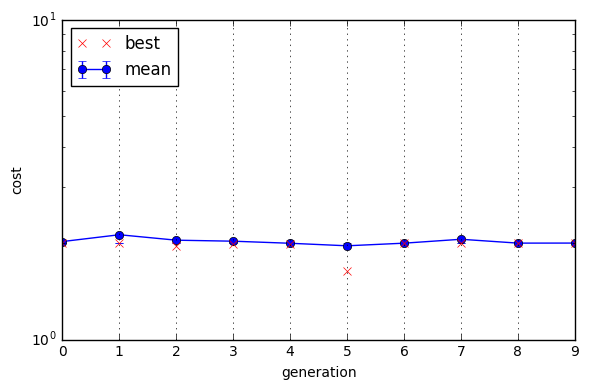

In [3]:
evo = cmaes.CMAEvolutionaryStrategy(0.5*np.ones(relcat_default_task.num_parameters), sigma0=0.2)
evo.engage(relcat_default_task, iterations=10,
        parallel=True, num_of_jobs=7,
        verbose=True,
        bounds=[(0,1) for i in range(relcat_default_task.num_parameters)],
        boundary_penalty=False)
%matplotlib inline
evo.plot_cost_over_time()

In [ ]:
# Use function version of CMA-ES for the task
best_agent_parameters, best_agent_performance = cmaes.fmin(relcat_default_task, 
        x0=np.random.uniform(0,1,size=relcat_default_task.num_parameters),
        sigma0=0.2, iterations=10,
        parallel=False, num_of_jobs=1,
        verbose=True,
        bounds=[(0,1) for i in range(relcat_default_task.num_parameters)])

In [4]:
relcat_default_task(np.random.uniform(0,1,size=relcat_default_task.num_parameters))

2.0

In [10]:
relcat_default_task.run_test_trial(evo.get_best(), 
                                   20.0, 40.0)

1

In [ ]:
from vpython import *
scene.title = "Trial Simulation"
scene.center = vector(relcat_default_task.world_right/2, 
                      relcat_default_task.world_bottom/2,0)
scene.background = color.black
scene.range = 175
box(pos=vector(relcat_default_task.world_right/2,
              relcat_default_task.world_bottom/2,0),
   length=relcat_default_task.world_right,
   height=relcat_default_task.world_bottom,
   width=1,
   color=color.white)
ball = sphere(pos=vector(relcat_default_task.object_records['ball']['x'][0],
                  relcat_default_task.object_records['ball']['y'][0],0),
             radius=relcat_default_task.object_records['ball']['radius'][0],
             color=color.blue)
agent = sphere(pos=vector(relcat_default_task.object_records['agent']['x'][0],
                  relcat_default_task.object_records['agent']['y'][0],0),
             radius=relcat_default_task.object_records['agent']['radius'][0],
             color=color.orange)
rays = []
for i in range(relcat_default_task.num_rays):
    rays.append(arrow(pos=vector(relcat_default_task.object_records[i]['x1'][0],
                          relcat_default_task.object_records[i]['y1'][0],0),
                     axis=vector(relcat_default_task.object_records[i]['x2'][0] 
                                 - relcat_default_task.object_records[i]['x1'][0],
                                 relcat_default_task.object_records[i]['y2'][0]
                                 - relcat_default_task.object_records[i]['y1'][0],0),
                     color=color.cyan,
                     shaftwidth=1))

while True:
    for i in range(len(relcat_default_task.time_records)):
        rate(150)
        ball.pos.x = relcat_default_task.object_records['ball']['x'][i]
        ball.pos.y = relcat_default_task.object_records['ball']['y'][i]
        ball.radius = relcat_default_task.object_records['ball']['radius'][i]
        agent.pos.x = relcat_default_task.object_records['agent']['x'][i]
        agent.pos.y = relcat_default_task.object_records['agent']['y'][i]
        agent.radius = relcat_default_task.object_records['agent']['radius'][i]
        for j, ray in enumerate(rays):
            ray.pos.x = relcat_default_task.object_records[j]['x1'][i]
            ray.pos.y = relcat_default_task.object_records[j]['y1'][i]
            ray.axis.x = relcat_default_task.object_records[j]['x2'][i] \
                    - relcat_default_task.object_records[j]['x1'][i]
            ray.axis.y = relcat_default_task.object_records[j]['y2'][i] \
                    - relcat_default_task.object_records[j]['y1'][i]